In [1]:
from IPython.display import Image

import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_digits as load
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, RandomTreesEmbedding
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
iris = load()

X = iris.data
y = iris.target

f = X.shape[1]

rnd_d3 = DecisionTreeClassifier(max_features=int(f ** 0.5))
d3 = DecisionTreeClassifier()

In [3]:
print('Decision tree:', cross_val_score(d3, X, y).mean())

Decision tree: 0.7785654596100279


In [4]:
print('Bagging:', cross_val_score(BaggingClassifier(d3), X, y).mean())

Bagging: 0.8892804085422469


In [5]:
print('Randomized Bagging:', cross_val_score(BaggingClassifier(rnd_d3), X, y).mean())

Randomized Bagging: 0.9026276694521821


In [6]:
"""
class sklearn.ensemble.RandomForestRegressor(
    n_estimators — число деревьев в "лесу" (по дефолту – 10)
    criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")
    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
    min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)
    min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)
    max_leaf_nodes — максимальное количество листьев (по дефолту нет ограничения)
    min_impurity_split — порог для остановки наращивания дерева (по дефолту 1е-7)
    bootstrap — применять ли бустрэп для построения дерева (по дефолту True)
    oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
    n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
    random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
    verbose — вывод логов по построению деревьев (по дефолту 0)
    warm_start — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)
)
"""

'\nclass sklearn.ensemble.RandomForestRegressor(\n    n_estimators — число деревьев в "лесу" (по дефолту – 10)\n    criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")\n    max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".\n    max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)\n    min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)\n    min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)\n    min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют о

In [7]:
"""
class sklearn.ensemble.RandomForestClassifier(
    criterion — поскольку у нас теперь задача классификации, то по дефолту выбран критерий "gini" (можно выбрать "entropy")
    class_weight — вес каждого класса (по дефолту все веса равны 1, но можно передать словарь с весами, либо явно указать "balanced", тогда веса классов будут равны их исходным частям в генеральной совокупности; также можно указать "balanced_subsample", тогда веса на каждой подвыборке будут меняться в зависимости от распределения классов на этой подвыборке.
)
"""

'\nclass sklearn.ensemble.RandomForestClassifier(\n    criterion — поскольку у нас теперь задача классификации, то по дефолту выбран критерий "gini" (можно выбрать "entropy")\n    class_weight — вес каждого класса (по дефолту все веса равны 1, но можно передать словарь с весами, либо явно указать "balanced", тогда веса классов будут равны их исходным частям в генеральной совокупности; также можно указать "balanced_subsample", тогда веса на каждой подвыборке будут меняться в зависимости от распределения классов на этой подвыборке.\n)\n'

In [17]:
df = pd.read_csv('telecom_churn.csv')

cols = []
for i in df.columns:
    if (df[i].dtype == 'float64') or (df[i].dtype == 'int64'):
        cols.append(i)
        
X, y = df[cols].copy(), np.asarray(df['Churn'], dtype='int8')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

results = cross_val_score(rfc, X, y, cv=skf)

print('CV accuracy score: {:.2f}%'.format(results.mean()*100))

CV accuracy score: 92.50%


In [20]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
tree_grid = [5, 10, 15, 20, 30, 50 ,75, 100]

for ntrees in tree_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
        
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)

print('Best accuracy on CV is {:.2f}% with {} trees'.format(max(test_acc.mean(axis=1))*100, tree_grid[np.argmax(test_acc.mean(axis=1))]))        
        
        
        

    

Best accuracy on CV is 92.50% with 100 trees


Text(0.5, 0, 'N_estimators')

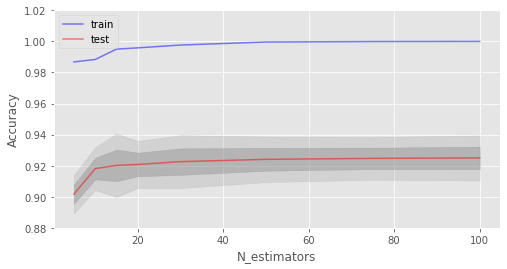

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(tree_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(tree_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='test')

ax.fill_between(tree_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(tree_grid, test_acc.mean(axis=1) - 2* test_acc.std(axis=1), test_acc.mean(axis=1) + 2* test_acc.std(axis=1), color='#888888', alpha=0.2)

ax.legend(loc='best')
ax.set_ylim([0.88, 1.02])
ax.set_ylabel('Accuracy')
ax.set_xlabel('N_estimators')


In [30]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_test_acc = []
    temp_train_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
        
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.44% with 24 max_depth


Text(0.5, 0, 'Max_depth')

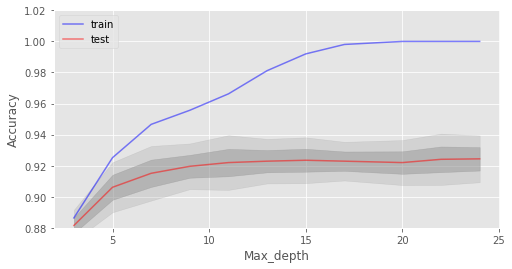

In [32]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='test')

ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2* test_acc.std(axis=1), test_acc.mean(axis=1) + 2* test_acc.std(axis=1), color='#888888', alpha=0.2)

ax.legend(loc='best')
ax.set_ylim([0.88, 1.02])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Max_depth')

In [33]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 1 min_samples_leaf


Text(0.5, 0, 'Min_samples_leaf')

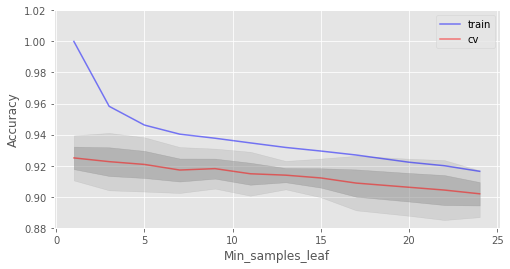

In [34]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf")

In [35]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 92.50% with 4 max_features


Text(0.5, 0, 'Max_features')

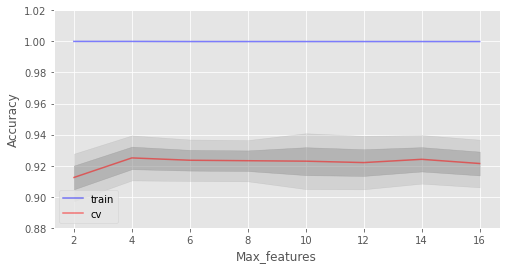

In [36]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.88,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features")

In [37]:
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y) 

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [42]:
gcv.score(X, y)

0.9606960696069607

In [43]:
for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators, n_jobs=-1)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print('n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc))

n_estimators =   10 train_acc = 0.9876265466816648 test_acc = 0.9144144144144144
n_estimators =   40 train_acc = 0.9988751406074241 test_acc = 0.9219219219219219
n_estimators =  100 train_acc =  1.0 test_acc = 0.9219219219219219
n_estimators =  200 train_acc =  1.0 test_acc = 0.924924924924925
n_estimators =  600 train_acc =  1.0 test_acc = 0.924924924924925
n_estimators = 1000 train_acc =  1.0 test_acc = 0.9234234234234234


In [44]:
for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print('n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc))

n_estimators =   10 train_acc = 0.9460067491563554 test_acc = 0.9234234234234234
n_estimators =   40 train_acc = 0.94750656167979 test_acc = 0.924924924924925
n_estimators =  100 train_acc = 0.9456317960254969 test_acc = 0.9264264264264265
n_estimators =  200 train_acc = 0.94750656167979 test_acc = 0.9264264264264265
n_estimators =  600 train_acc = 0.9482564679415073 test_acc = 0.924924924924925
n_estimators = 1000 train_acc = 0.9478815148106486 test_acc = 0.9264264264264265


In [45]:
for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=14), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print('n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc))

n_estimators =   10 train_acc = 0.9793775778027747 test_acc = 0.9264264264264265
n_estimators =   40 train_acc = 0.9880014998125234 test_acc = 0.9204204204204204
n_estimators =  100 train_acc = 0.9883764529433821 test_acc = 0.9234234234234234
n_estimators =  200 train_acc = 0.9891263592050994 test_acc = 0.924924924924925
n_estimators =  600 train_acc = 0.9902512185976753 test_acc = 0.9234234234234234
n_estimators = 1000 train_acc = 0.9902512185976753 test_acc = 0.9219219219219219


In [47]:
from __future__ import division, print_function

from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

hostel_data = pd.read_csv("hostel_factors.csv")
features = {"f1":u"Персонал",
"f2":u"Бронирование хостела ",
"f3":u"Заезд в хостел и выезд из хостела",
"f4":u"Состояние комнаты",
"f5":u"Состояние общей кухни",
"f6":u"Состояние общего пространства",
"f7":u"Дополнительные услуги",
"f8":u"Общие условия и удобства",
"f9":u"Цена/качество",
"f10":u"ССЦ"}

In [49]:
hostel_data

,hostel,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,rating
0,hostel1,0.675000,0.100000,0.300000,0.875000,0.250000,0.425000,0.350000,0.725000,0.400000,0.275000,9.0
1,hostel2,0.500000,0.000000,0.058824,0.573529,0.117647,0.382353,0.000000,0.161765,0.308824,0.000000,8.3
2,hostel3,0.520833,0.041667,0.020833,0.666667,0.229167,0.437500,0.270833,0.250000,0.395833,0.270833,8.6
3,hostel4,0.692308,0.038462,0.038462,0.346154,0.076923,0.307692,0.500000,0.115385,0.153846,0.269231,7.6
4,hostel5,0.620690,0.000000,0.000000,0.517241,0.172414,0.344828,0.172414,0.379310,0.103448,0.310345,8.7
5,hostel6,0.973684,0.052632,0.078947,0.552632,0.210526,0.473684,0.315789,0.684211,0.105263,0.263158,9.4
6,hostel7,0.643836,0.013699,0.013699,0.671233,0.178082,0.136986,0.191781,0.493151,0.191781,0.000000,8.4
7,hostel8,0.309091,0.163636,0.145455,0.545455,0.218182,0.345455,0.200000,0.454545,0.363636,0.254545,7.0
8,hostel9,0.666667,0.018519,0.037037,0.500000,0.185185,0.333333,0.259259,0.370370,0.000000,0.333333,8.9
9,hostel10,0.500000,0.000000,0.000000,0.616279,0.360465,0.337209,0.104651,0.255814,0.116279,0.023256,8.3


Feature ranking:
1. Персонал 0.183150 
2. Цена/качество 0.147704 
3. Состояние общего пространства 0.128188 
4. Дополнительные услуги 0.116819 
5. ССЦ 0.105748 
6. Общие условия и удобства 0.088730 
7. Состояние общей кухни 0.074776 
8. Заезд в хостел и выезд из хостела 0.061881 
9. Бронирование хостела  0.053899 
10. Состояние комнаты 0.039105 


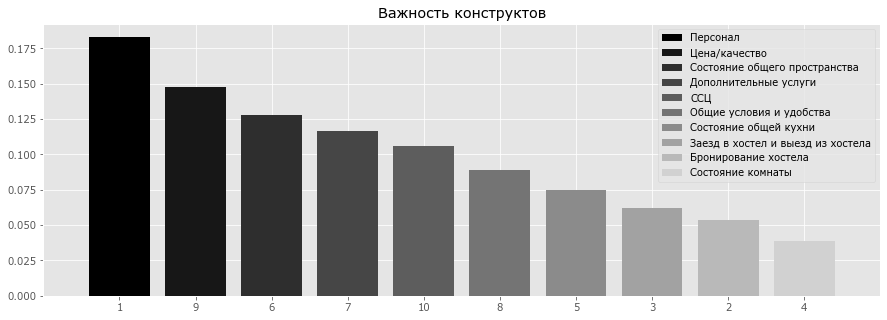

In [50]:
forest = RandomForestRegressor(n_estimators=1000, max_features=10, random_state=0)

forest.fit(hostel_data.drop(['hostel', 'rating'], axis=1), hostel_data['rating'])
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

num_to_plot = 10
feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

print('Feature ranking:')

for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
plt.figure(figsize=(15,5))
plt.title(u"Важность конструктов")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices])